In [3]:
import numpy as np
from scipy.integrate import solve_ivp

def generateODE(t, m):
    # Unpack the variables from the y vector
    m0, m1, m2, m3, m4, M, c = m

    cf = 0.25                                   # kg lactose/ kg of solution
    
    kg = 2.25*10**(-6)
    kb = 2.51*10**(8)
    b = 0.15
    g = 1.65
    
    rho_f = 1092                                 # 1092kg/m3          # 0.001092kg/mL
    rho_c = 1545                                 # 1545kg/m3          # 0.001545kg/mL
    rho_e = 793                                  # 793kg/m3           # 0.000793
    rho_eqm = 898                                # 898kg/m3           # 0.000898
    
    #voi = 0.911                                 # kg of sol/kg of slurry
    
    voi = 1-rho_c*m3                             # kg of sol/kg of slurry
    #print(voi)
    x = 0.44                                     # kg of ethanol/ kg of soln

    cc = rho_c*m3
    TS = voi*c + 0.95 * cc
    rho_sl = 983.2*(np.exp(0.0042*TS))
    #print(rho_sl)
    rho_s = (rho_e*rho_sl) / (x*rho_sl + (1-x)*rho_e)
    #print(rho_s)
    V = 0.00045                                                  # 450ml      0.00045m3
    T = 40                                                       # c

    
    Qf = 0.25*10**(-6)                              # 0.25 ml/sec     0.25*10**(-6) m3/sec
    Qe = 0.25*10**(-6)                              # 0.25 ml/sec       0.25*10**(-6) m3/sec
    Q0 = 0.5*10**(-6)                               # 0.5 ml/sec            0.5*10**(-6) m3/sec
    Qr = 0.25*10**(-6)                              # 0.25 ml/sec       0.25*10**(-6) m3/sec
    
    
    # M = V * rho_sl = 0.040039885
    
    tau = 900                                       # M / (Q0 * rho_s)
    km = 1.54

    ca = c / (1 + km)
    cb= km * ca
    km = cb / ca
    
    ce = 0.050466                            #-0.4948 * x**4 + 0.9069 * x**3 - 0.1292 * x**2 - 0.5362 * x + 0.2527
    
    F = 0.048                              #F = 0.0187 * (np.exp(0.0236 * T))
    
    
    cae = (ce - F * km * (c - ce)) / (1 + km)
    
    delta_c = max(ca - cae, 0)

    G = kg * (delta_c)**g
    B = kb * (delta_c)**b

    dm0 = B
    dm1 = (G * m0) 
    dm2 = 2 * (G * m1)
    dm3 = 3 * (G * m2) 
    dm4 = 4 * (G * m3)
    dM = Qf*rho_f + Qe*rho_e
    dc = (Qf * rho_f * cf) / (M * voi) - (voi*(c-0.95)+0.95)*(Qf*rho_f + Qe*rho_e)/(M * voi) - (M*(c-0.95))*(-rho_c*(3 * (G * m2)))/(M*voi)
    return [dm0, dm1, dm2, dm3, dm4, dM, dc]

t_span = (0, 900)
num_points = 30
initialConditions = [0, 0, 0, 0, 0, 0.000000001, 0.25]

sol1 = solve_ivp(
    lambda t, m: generateODE(t, m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

Text(0, 0.5, 'zeroth moment')

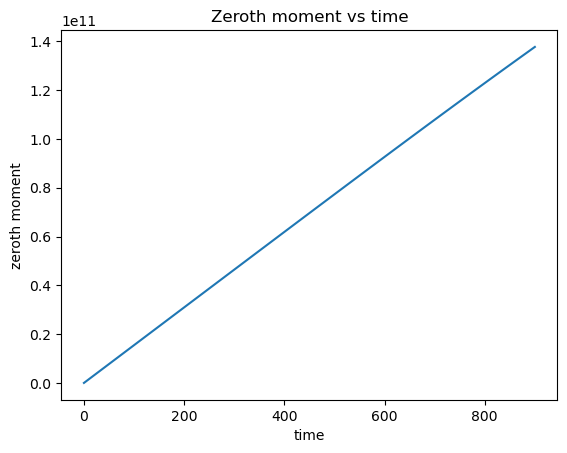

In [4]:
import matplotlib.pyplot as plt
plt.plot(sol1.t,sol1.y[0])
plt.title("Zeroth moment vs time")
plt.xlabel("time")
plt.ylabel("zeroth moment")

Text(0, 0.5, 'concentration')

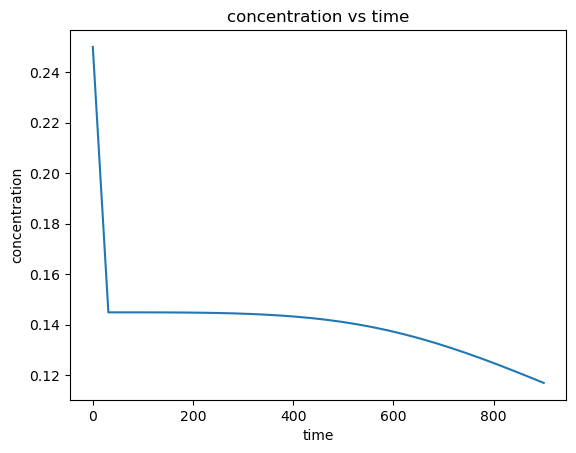

In [3]:
plt.plot(sol1.t,sol1.y[6])
plt.title("concentration vs time")
plt.xlabel("time")
plt.ylabel("concentration")

Text(0, 0.5, 'mass inside crystallizer')

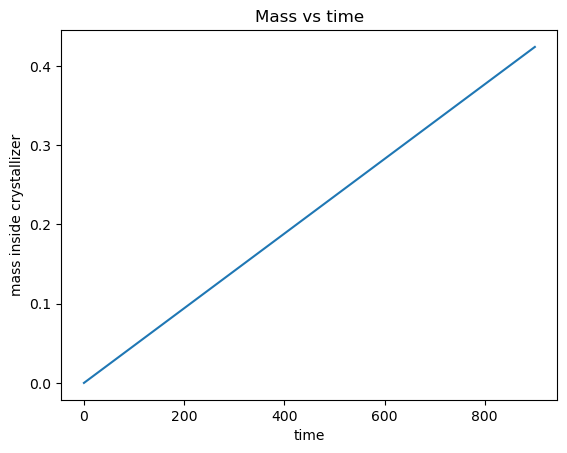

In [4]:
plt.plot(sol1.t,sol1.y[5])
plt.title("Mass vs time")
plt.xlabel("time")
plt.ylabel("mass inside crystallizer")

In [14]:
import numpy as np
from scipy.integrate import solve_ivp

def generateODE(t, m):
    # Unpack the variables from the y vector
    m0, m1, m2, m3, m4, M, c = m

    cf = 0.25                                   # kg lactose/ kg of solution
    
    kg = 2.16*10**(-6)
    kb = 2.06*10**(8)
    b = 0.15
    g = 1.65
    
    rho_f = 1092                                 # 1092kg/m3          # 0.001092kg/mL
    rho_c = 1545                                 # 1545kg/m3          # 0.001545kg/mL
    rho_e = 793                                  # 793kg/m3           # 0.000793
    rho_eqm = 898                                # 898kg/m3           # 0.000898
    
    #voi = 0.911                                 # kg of sol/kg of slurry
    
    voi = 1-rho_c*m3                             # kg of sol/kg of slurry
    #print(voi)
    x = 0.44                                     # kg of ethanol/ kg of soln

    cc = rho_c*m3
    TS = voi*c + 0.95 * cc
    rho_sl = 983.2*(np.exp(0.0042*TS))
    # print(rho_sl)
    rho_s = (rho_e*rho_sl) / (x*rho_sl + (1-x)*rho_e)
    #print(rho_s)
    V = 0.00045                                                  # 450ml      0.00045m3
    T = 40                                                       # c

    
    Qf = 0.25*10**(-6)                              # 0.25 ml/sec     0.25*10**(-6) m3/sec
    Qe = 0.25*10**(-6)                              # 0.25 ml/sec       0.25*10**(-6) m3/sec
    Q0 = 0.5*10**(-6)                               # 0.5 ml/sec            0.5*10**(-6) m3/sec
    Qr = 0.25*10**(-6)                              # 0.25 ml/sec       0.25*10**(-6) m3/sec
    
    
    # M = V * rho_sl = 0.040039885
    
    tau = 900                                       # M / (Q0 * rho_s)
    km = 1.54

    ca = c / (1 + km)
    cb= km * ca
    km = cb / ca
    
    ce = 0.050466                            #-0.4948 * x**4 + 0.9069 * x**3 - 0.1292 * x**2 - 0.5362 * x + 0.2527
    
    F = 0.048                              #F = 0.0187 * (np.exp(0.0236 * T))
    
    
    cae = (ce - F * km * (c - ce)) / (1 + km)
    
    delta_c = max(ca - cae, 0)

    G = kg * (delta_c)**g
    B = kb * (delta_c)**b

    dm0 = (-m0 / tau) + B
    dm1 = (G * m0) - (m1 / tau)
    dm2 = 2 * (G * m1) - (m2 / tau)
    dm3 = 3 * (G * m2) - (m3 / tau)
    dm4 = 4 * (G * m3) - (m4 / tau)
    
    dM = Qf*rho_f + Qe*rho_e - Q0*rho_s*x - Q0*rho_s*voi - 0.95*Q0*rho_c*(1-voi)

    dc = (Qf * rho_f * cf) / (M * voi) - (c*Q0*rho_s) / M -(0.95 * rho_c * (1 - voi)*Q0) /M - (M * (c - 0.95) * (-rho_c*(3 * (G * m2) - (m3 / tau)))) / (M * voi)- ((c * voi + 0.95 * (1 - voi)) * (Qf * rho_f + Qe * rho_e - Q0 * rho_s * x- Q0 * rho_s * voi - 0.95 * Q0 * rho_c * (1 - voi))) / (M * voi)
    
    return [dm0, dm1, dm2, dm3, dm4, dM, dc]

t_span = (0, 8000)
num_points = 8000
initialConditions = [137729371966.33163, 567172.9595091654, 3.283245317839304, 2.1705334630562764*10**(-5), 1.5411896773688675*10**(-10), 0.424135, 0.11689]

sol = solve_ivp(
    lambda t, m: generateODE(t, m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

Text(0, 0.5, 'zeroth moment')

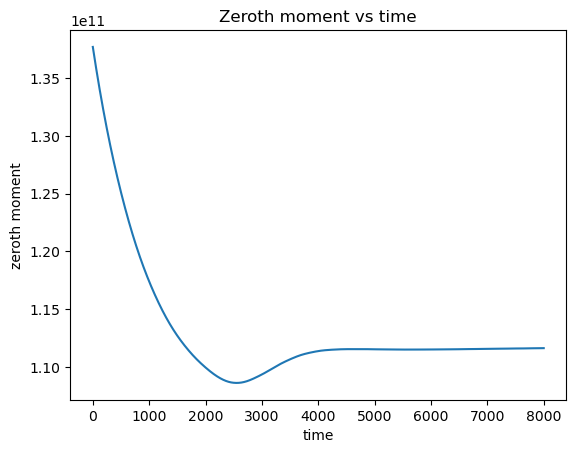

In [15]:
import matplotlib.pyplot as plt
plt.plot(sol.t,sol.y[0])
plt.title("Zeroth moment vs time")
plt.xlabel("time")
plt.ylabel("zeroth moment")

Text(0, 0.5, '1st moment')

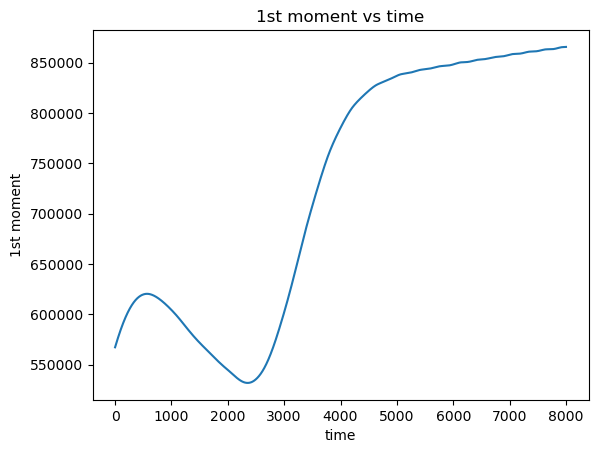

In [11]:
plt.plot(sol.t,sol.y[1])
plt.title("1st moment vs time")
plt.xlabel("time")
plt.ylabel("1st moment")

Text(0, 0.5, '2nd moment')

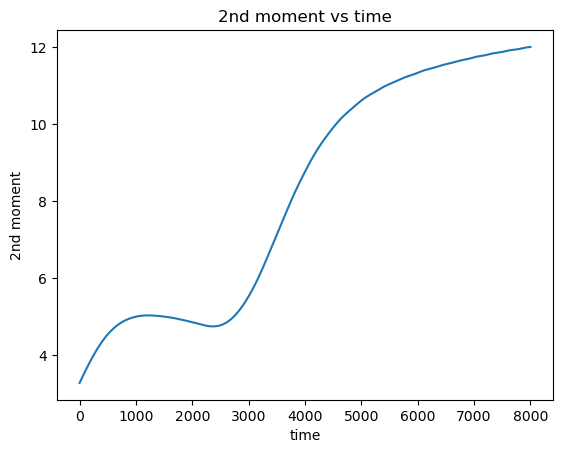

In [12]:
plt.plot(sol.t,sol.y[2])
plt.title("2nd moment vs time")
plt.xlabel("time")
plt.ylabel("2nd moment")

Text(0, 0.5, '3rd moment')

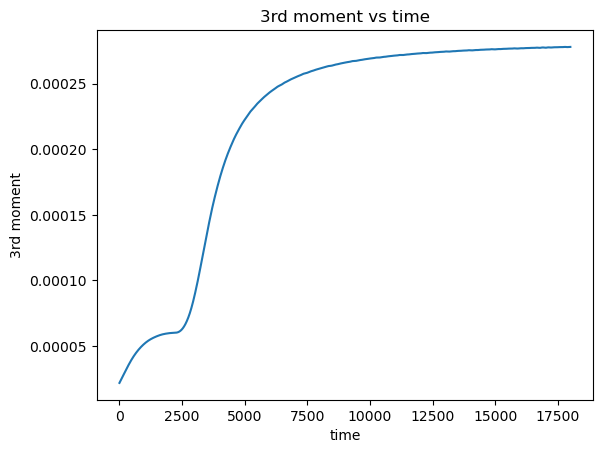

In [9]:
plt.plot(sol.t,sol.y[3])
plt.title("3rd moment vs time")
plt.xlabel("time")
plt.ylabel("3rd moment")

Text(0, 0.5, '4th moment')

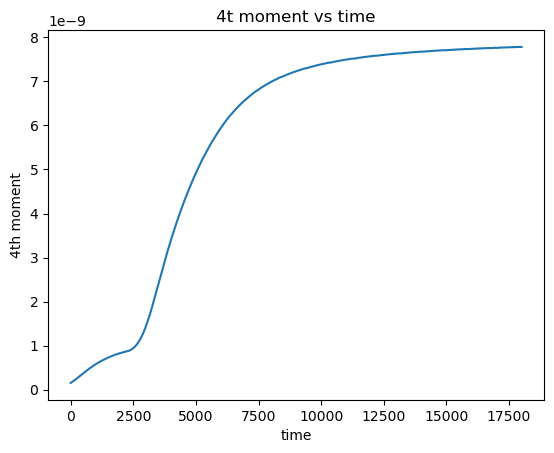

In [10]:
plt.plot(sol.t,sol.y[4])
plt.title("4t moment vs time")
plt.xlabel("time")
plt.ylabel("4th moment")

Text(0, 0.5, 'concentration')

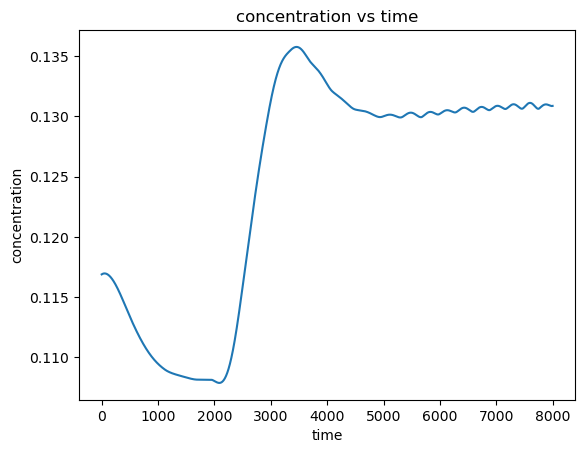

In [16]:
plt.plot(sol.t,sol.y[6])
plt.title("concentration vs time")
plt.xlabel("time")
plt.ylabel("concentration")

In [15]:
import numpy as np
from scipy.integrate import solve_ivp

def generateODE(t, m):
    # Unpack the variables from the y vector
    m0, m1, m2, m3, m4, Mt, ct, M, c = m

    cf = 0.25
    kg = 2.29 * 10**8
    kb = 2.16 * 10**(-6)
    b = 0.15
    g = 1.65
    rho_f = 1092             # kg/m3
    rho_c = 1545             # kg/m3
    rho_e = 793              # kg/m3
    rho_eqm = 898            # kg/m3
    
    
    
    voi = 1              # kg of sol/kg of slurry
    voir = 1
    voit = 1
    
    x = 0.44                 # kg of ethanol/ kg of soln

    cc = rho_c * m3
    TS = voi * c + 0.95 * cc
    rho_sl = 983.2 * (np.exp(0.0042 * TS))

    rho_s = 1 / (x / rho_e + (1 - x) / rho_sl)
    
    rho_r = 942.5
    rho_t = rho_s

    V = 0.00045                                                  # 450ml      0.00045m3
    T = 40                                                       # c
    k = 3.14 / 6

    Qf = 0.125*10**(-6)                              # 0.25 ml/sec     0.25*10**(-6) m3/sec
    Qe = 0.125*10**(-6)                              # 0.25 ml/sec       0.25*10**(-6) m3/sec
    Q0 = 0.5*10**(-6)                               # 0.5 ml/sec            0.5*10**(-6) m3/sec
    Qr = 0.25*10**(-6)                              # 0.25 ml/sec       0.25*10**(-6) m3/sec
    Qout=0.5*10**(-6)
    
    M = V * rho_sl
    tau = M / (Q0 * rho_s)
    km = 1.5393

    ca = c / (1 + km)
    cb = km*ca
    km = cb / ca

    ce = -0.4948 * x**4 + 0.9069 * x**3 - 0.1292 * x**2 - 0.5362 * x + 0.2527

    F = 0.0187 * (np.exp(0.0236 * T))
    
    cae = (ce - F * km * (c - ce)) / (1 + km)

    delta_c = max(ca - cae, 0)

    G = kb * (delta_c)**b
    B = kg * (delta_c)**g

    dm0 = (-m0 / tau) + B
    dm1 = (G * m0) - (m1 / tau)
    dm2 = 2 * (G * m1) - (m2 / tau)
    dm3 = 3 * (G * m2) - (m3 / tau)
    dm4 = 4 * (G * m3) - (m4 / tau)
    
    dMt= Q0*voi*rho_s - Qr*voir*rho_r - Qout*voit*rho_t        # recycle without fines
    
    #dmt = Q0*voi*rho_s + 0.95*Q0*(1-voi)*rho_c - Qr*voir*rho_r - 0.95*Qr*(1-voir)*rho_c - Qout*voit*rho_t - 0.95*Qout*(1-voit)*rho_c      # recycle with fines
    
    #Q0*voi*rho_c=Qr*voir*rho_c + Qout*voit*rho_c
    
    dct = (Q0*rho_s*c)/(M*voi) + (0.95*Q0*(1-voi)*rho_c)/(M*voi) - (Qout*rho_t*ct)/(M*voi) -(0.95*Qout*(1-voit)*rho_c)/(M*voi) - (Qr*rho_r*ct)/(M*voi) - (0.95*Qr*(1-voir)*rho_c)/(M*voi) - Mt*(c-0.95)*(-rho_c*(3 * (G * m2) - (m3 / tau)))/(M*voi) - (c*voi + 0.95*(1-voi))*(Q0*voi*rho_s - Qr*voir*rho_r - Qout*voit*rho_t)/(M*voi)

    
    dM = Qf*rho_f + Qe*rho_e + Qr*voir*rho_r + 0.95*Qr*(1-voir)*rho_c - Q0*rho_s*x - Q0*rho_s*voi-0.95*Q0*rho_c*(1-voi)
    dc = (Qf * rho_f * cf) / (M * voi)  + (Qr*rho_r*ct)/(M*voi) + (0.95*Qr*rho_c*(1-voir))/(M*voi) - c/tau - (0.95*rho_c*(1-voi))/(tau*rho_s) - (M*(c-0.95)*(-rho_c*(3 * (G * m2) - (m3 / tau))))/(M*voi) - ((c*voi + 0.95*(1-voi))*( Qf*rho_f + Qe*rho_e + Qr*voir*rho_r + 0.95*Qr*(1-voir)*rho_c - Q0*rho_s*x - Q0*rho_s*voi-0.95*Q0*rho_c*(1-voi)))/(M*voi)         

    return [dm0, dm1, dm2, dm3, dm4, dMt, dct, dM, dc]

t_span = (0, 8000)
num_points = 8000
initialConditions = [137729371966.33163, 567172.9595091654, 3.283245317839304, 2.1705334630562764*10**(-5), 1.5411896773688675*10**(-10), 0.424135, 0.11689, 0.424135, 0.11689]

sol = solve_ivp(
    lambda t, m: generateODE(t, m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

C:\Users\heman\AppData\Local\Temp\ipykernel_3724\2526418169.py:28: RuntimeWarning: overflow encountered in exp
  rho_sl = 983.2 * (np.exp(0.0042 * TS))
C:\Users\heman\AppData\Local\Temp\ipykernel_3724\2526418169.py:80: RuntimeWarning: invalid value encountered in scalar divide
  dc = (Qf * rho_f * cf) / (M * voi)  + (Qr*rho_r*ct)/(M*voi) + (0.95*Qr*rho_c*(1-voir))/(M*voi) - c/tau - (0.95*rho_c*(1-voi))/(tau*rho_s) - (M*(c-0.95)*(-rho_c*(3 * (G * m2) - (m3 / tau))))/(M*voi) - ((c*voi + 0.95*(1-voi))*( Qf*rho_f + Qe*rho_e + Qr*voir*rho_r + 0.95*Qr*(1-voir)*rho_c - Q0*rho_s*x - Q0*rho_s*voi-0.95*Q0*rho_c*(1-voi)))/(M*voi)
C:\Users\heman\AppData\Local\Temp\ipykernel_3724\2526418169.py:62: RuntimeWarning: overflow encountered in scalar power
  B = kg * (delta_c)**g
C:\Users\heman\AppData\Local\Temp\ipykernel_3724\2526418169.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  rho_s = 1 / (x / rho_e + (1 - x) / rho_sl)
C:\Users\heman\AppData\Local\Temp\ipykernel_3724\25264181

In [4]:
import numpy as np
from scipy.integrate import solve_ivp

def generateODE(t, m):
    # Unpack the variables from the y vector
    m0, m1, m2, m3, m4, mt, ct, M, c = m

    cf = 0.25
    kg = 2.29 * 10**8
    kb = 2.16 * 10**(-6)
    b = 0.15
    g = 1.65
    rho_f = 1092             # kg/m3
    rho_c = 1545             # kg/m3
    rho_e = 793              # kg/m3
    rho_eqm = 898            # kg/m3
    
    voi = 1-rho_c*m3
    
    
    voi = 1              # kg of sol/kg of slurry
    voir= 1
    voit=1
    
    x = 0.44                 # kg of ethanol/ kg of soln

    cc = rho_c * m3
    TS = voi * c + 0.95 * cc
    rho_sl = 983.2 * (np.exp(0.0042 * TS))

    rho_s = 1 / (x / rho_e + (1 - x) / rho_sl)
    
    rho_r = 942.5
    rho_t = rho_s

    V = 0.00045                                                  # 450ml      0.00045m3
    T = 40                                                       # c
    k = 3.14 / 6

    Qf = 0.125*10**(-6)                              # 0.25 ml/sec     0.25*10**(-6) m3/sec
    Qe = 0.125*10**(-6)                              # 0.25 ml/sec       0.25*10**(-6) m3/sec
    Q0 = 0.5*10**(-6)                               # 0.5 ml/sec            0.5*10**(-6) m3/sec
    Qr = 0.25*10**(-6)                              # 0.25 ml/sec       0.25*10**(-6) m3/sec
    Qout=0.5*10**(-6)
    
    M = V * rho_sl
    tau = M / (Q0 * rho_s)
    km = 1.5393

    ca = 1 / (1 + km)
    cb = c - ca
    km = ca / cb

    ce = -0.4948 * x**4 + 0.9069 * x**3 - 0.1292 * x**2 - 0.5362 * x + 0.2527

    F = 0.0187 * (np.exp(0.0236 * T))
    
    cae = (ce - F * km * (c - ce)) / (1 + km)

    delta_c = max(ca - cae, 0)

    G = kb * (delta_c)**b
    B = kg * (delta_c)**g

    dm0 = (-m0 / tau) + B
    dm1 = (G * m0) - (m1 / tau)
    dm2 = 2 * (G * m1) - (m2 / tau)
    dm3 = 3 * (G * m2) - (m3 / tau)
    dm4 = 4 * (G * m3) - (m4 / tau)
    
    #dmt= Q0*voi*rho_s - Qr*voir*rho_r - Qout*voit*rho_t        # recycle without fines
    
    dmt = Q0*voi*rho_s + 0.95*Q0*(1-voi)*rho_c - Qr*voir*rho_r - 0.95*Qr*(1-voir)*rho_c - Qout*voit*rho_t - 0.95*Qout*(1-voit)*rho_c      # recycle with fines
    
    Q0*voi*rho_c=Qr*voir*rho_c + Qout*voit*rho_c
    
    dct = (Q0*rho_s*c)/(M*voi) + (0.95*Q0*(1-voi)*rho_c)/(M*voi) - (Qout*rho_t*ct)/(M*voi) -(0.95*Qout*(1-voit)*rho_c)/(M*voi) - (Qr*rho_r*ct)/(M*voi) - (0.95*Qr*(1-voir)*rho_c)/(M*voi) - Mt(c-0.95)(-rho_c(3 * (G * m2) - (m3 / tau)))/(M*voi) - (c*voi + 0.95*(1-voi))(Q0*voi*rho_s - Qr*voir*rho_r - Qout*voit*rho_t)/(M*voi)

    
    dM = Qf*rho_f + Qe*rho_e + Qr*voir*rho_r + 0.95*Qr*(1-voir)*rho_c - Q0*rho_s*x - Q0*rho_s*voi-0.95*Q0*rho_c*(1-voi)
    dc = (Qf * rho_f * cf) / (M * voi)  + (Qr*rho_r*ct)/(M*voi) + (0.95*Qr*rho_c*(1-voir))/(M*voi) - c/tau - (0.95*rho_c*(1-voi))/(tau*rho_s) - (M*(c-0.95)(-rho_c*(3 * (G * m2) - (m3 / tau))))/(M*voi) - ((c*voi + 0.95*(1-voi))( Qf*rho_f + Qe*rho_e + Qr*voir*rho_r + 0.95*Qr*(1-voir)*rho_c - Q0*rho_s*x - Q0*rho_s*voi-0.95*Q0*rho_c*(1-voi)))/(M*voi)         

    return [dm0, dm1, dm2, dm3, dm4,dmt, dct, dM, dc]

t_span = (0, 10000)
num_points = 10000
initialConditions = [7.1*10**10, 3.62*10**5, 1.915, 1.115*10**(-5),7.94*10**(-11), 404100, 0.25]

sol = solve_ivp(
    lambda t, m: generateODE(t, m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

SyntaxError: invalid syntax (2340996877.py, line 69)